In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Galton_Watson1(n, θ, y, ys, z):
    for gen in range(n+1):  #loop over the generations
            ys[gen,sim] = y
            w = np.array([0,0,0])
            for c in range(y): #loop of the cell
                r = np.random.random()
                if r < θ[0]:
                    w[0]+=1 # count deaths (a0) in a single generation
                    z[0]+=1 # count deaths (a0)in population history
                elif r >= θ[0] and r < np.sum(θ[:2]): 
                    w[1]+=1 # count inactivation (a1) in a single generation
                    z[1]+=1 # count inactivation (a1) in population history
                else: 
                    w[2]+=1 # count division (a2) in a single generation
                    z[2]+=1 # count division (a2)in population history
            y = y -w[0] + w[2] #update the population
    return y, ys, z

In [3]:
# Parameters
n = 8        # Number of generations
m = 10       # Number of samples

# Initial guesses for theta
θ = np.array([0.1, 0.2, 0.7], dtype=np.float64)
ys = np.zeros((n+1,m))
yᵢ=1
z = np.array([0,0,0]) #hidden variable (num of deaths, inactivations and divisions)

#generate m indipendend samples using 1-type Galton-Watson
for sim in range(0,m):  #loop over the generations
    y =  yᵢ#initial population (num of cells)
    y, ys, z = Galton_Watson1(n, θ, y, ys,z) #Galton-Watson

In [4]:
#save Zt
#np.savetxt('dataGW/GW1_Y_gen'+str(n)+'_num_sim'+str(m)+'_θ'+str(θ)+'_zk'+str(z)+'_yi'+str(yᵢ)+'.txt', ys,  fmt='%4d')
#np.savetxt('../../branching_mathematica/GW1/GW1_data_article/GW1_Y_gen'+str(n)+'_num_sim'+str(m)+'_θ'+str(θ)+'zk'+str(z)+'.txt', ys,  fmt='%4d')

Text(0, 0.5, 'number of cells')

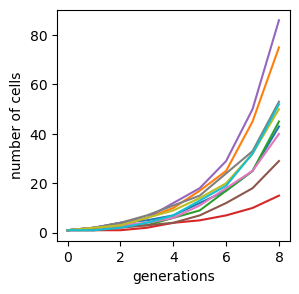

In [8]:
plt.figure(figsize=(3,3))
plt.plot(ys);
plt.xlabel("generations")
plt.ylabel("number of cells")